In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import datetime

In [2]:
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [5]:
data.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [6]:
# imputer = SimpleImputer(missing_values=np.nan, strategy="mean")  # The default method is to fill in the mean value
# data.loc[:, 'pm2.5'] = imputer.fit_transform(data.loc[:, 'pm2.5'].values.reshape(-1, 1))
# print(data.info())

In [7]:
# data.drop(columns=['No'], inplace=True)


In [8]:
# data['time'] = data.apply(lambda x: datetime.datetime(year=x['year']
#                                                       , month=x['month']
#                                                       , day=x['day']
#                                                       , hour=x['hour']), axis=1)

In [6]:
df = data[pd.notna(data["pm2.5"])]
 
print(df.shape)
df.head()

(41757, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [7]:
df.isnull().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [8]:

df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour', 'No'], inplace=True)
df = df.set_index('time')
values = df.values
df.head()


<ipython-input-8-8e9755e52f8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


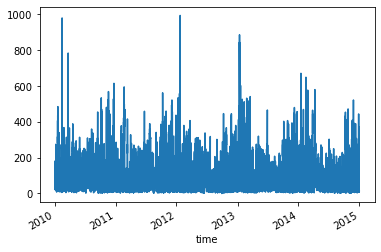

In [9]:
df['pm2.5'].plot()



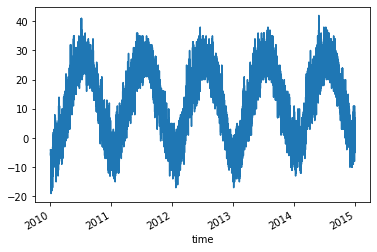

In [10]:
df['TEMP'].plot()

In [11]:
df = df.join(pd.get_dummies(df['cbwd'])) # one-hot encoding
#del df['cbwd']
df = df.drop(['cbwd'],axis=1)
df.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [12]:
seq_len = 5*24 # observe the data for the past 5 days
delay = 24 # predict the PM2.5 value one day after

df_ = np.array([df.iloc[i : i + seq_len + delay].values for i in range(len(df) - seq_len - delay)])
df_.shape

(41613, 144, 11)

In [13]:
#np.random.shuffle(df_)
x = df_[:, :5*24, :]
y = df_[:, -1, 0]
x.shape, y.shape

((41613, 120, 11), (41613,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [16]:
X_train.shape, X_test.shape


((24967, 120, 11), (16646, 120, 11))

In [19]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std 

In [20]:
X_train.shape, X_test.shape



((24967, 120, 11), (16646, 120, 11))

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(120, 11)))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                5632      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='mae')
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 8s 40ms/step - loss: 91.0368 - val_loss: 86.1963
Epoch 2/10
196/196 [==============================] - 8s 40ms/step - loss: 83.1191 - val_loss: 81.5028
Epoch 3/10
196/196 [==============================] - 7s 35ms/step - loss: 79.1943 - val_loss: 78.1622
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 76.2525 - val_loss: 75.5168
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 73.8928 - val_loss: 73.3316
Epoch 6/10
196/196 [==============================] - 7s 35ms/step - loss: 71.9669 - val_loss: 71.5478
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 70.4157 - val_loss: 70.1041
Epoch 8/10
196/196 [==============================] - 7s 36ms/step - loss: 69.1602 - val_loss: 68.9306
Epoch 9/10
196/196 [==============================] - 7s 35ms/step - loss: 68.1630 - val_loss: 67.9934
Epoch 10/10
196/196 [==============================] - 7s 37ms/step - los

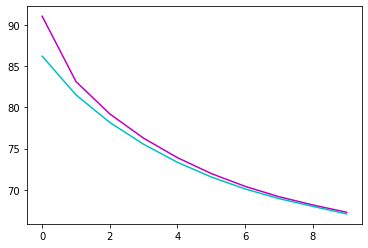

In [23]:
plt.plot(history.epoch, history.history['loss'], c='m')
plt.plot(history.epoch, history.history['val_loss'], c='c')

In [24]:
model.evaluate(X_test, y_test, verbose=0)


67.0736083984375

In [25]:
test_predict = model.predict(X_test)

In [36]:
test_data = df[-120:]
test_data = (test_data - mean)/std
test_data


,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
time,,,,,,,,,,,
2014-12-27 00:00:00,0.705650,-0.810170,-1.427797,1.315006,-0.441246,-0.072795,-0.135789,-0.358900,1.453648,-0.732156,-0.524402
2014-12-27 01:00:00,1.040123,-0.809090,-1.428463,1.315094,-0.406435,-0.071275,-0.135134,-0.358758,1.451115,-0.733318,-0.522229
2014-12-27 02:00:00,0.965121,-0.808453,-1.427059,1.315162,-0.371848,-0.070977,-0.135673,-0.359042,1.446998,-0.732737,-0.520613
2014-12-27 03:00:00,1.283431,-0.876998,-1.509144,1.315052,-0.336437,-0.071061,-0.135538,-0.359539,1.448722,-0.732027,-0.521669
2014-12-27 04:00:00,1.378756,-0.876408,-1.509651,1.314978,-0.300726,-0.071500,-0.135156,-0.357548,1.450450,-0.732673,-0.523595
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,-0.985871,-1.716520,-1.186759,1.707298,4.171559,-0.069622,-0.137066,-0.358188,1.446072,-0.729641,-0.523905
2014-12-31 20:00:00,-0.963926,-1.645901,-1.269453,1.706559,4.302646,-0.068268,-0.136604,-0.356835,1.450450,-0.732931,-0.523967
2014-12-31 21:00:00,-0.963985,-1.645385,-1.269593,1.706169,4.421706,-0.066978,-0.136960,-0.357619,1.448589,-0.730930,-0.524340


In [27]:
test_data = np.expand_dims(test_data, axis=0)
test_data

array([[[ 0.70564964, -0.81017035, -1.42779729, ...,  1.45364792,
         -0.73215617, -0.52440199],
        [ 1.04012315, -0.80908964, -1.42846284, ...,  1.45111493,
         -0.73331822, -0.52222853],
        [ 0.96512117, -0.80845311, -1.42705928, ...,  1.44699835,
         -0.7327371 , -0.52061313],
        ...,
        [-0.96398456, -1.64538487, -1.26959273, ...,  1.44858949,
         -0.73093037, -0.52433991],
        [-0.98772714, -1.64510134, -1.35357416, ...,  1.45338093,
         -0.7323498 , -0.52092384],
        [-0.94225332, -1.57567964, -1.27196434, ...,  1.45298061,
         -0.73118836, -0.52260121]]])